<img src="logoitesojupyter.png"><br>
<h1><center>Proyecto de Aplicación: Manejo de Datos y de Similitud</center></h1><br>
<center>DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA (DEAM) </center><br>
<center><strong>Materia</strong>: Ciencia de Datos e Ingeligencia de Negocios</center><br>
<center>Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO), A. C. </center><br>
<center><strong>Prof</strong>. Gaddiel Desirena </center><br>
<center><strong>Periodo</strong>: Otoño 2020 </center><br>
<center><strong>Programa</strong>: Igeniería Financiera </center>

<p><font color = "blue"><center><b><strong>Nombre de los integrantes:</strong></b></center></font>
<center>Moisés Flores Ortiz. Exp. 722183 </center>
<center>Aranzazú Rendón Gómez. Exp. </center>
<center>Miriam Eunice Rosas Medellín. Exp. 721272</center></p>

**Aquí escribimos el objetivo de nuestro análisis (planteamiento del problema, justiificación, objetivos, etc.).**

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import scipy.spatial.distance as sc
import matplotlib.pyplot as plt
import numpy as np
from CDIN import CDIN as eda

In [2]:
# Importar datos
data = pd.read_csv("../DATA/7210_1.csv")
# Mostrar datos
data.head(5)

C:\Users\miria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. EDA

## EDA - Limpieza de Datos

In [3]:
#Hacer reporte de calidad de datos
report = eda.dqr(data)
# Mostrar reporte
report

,data_types,missing_values,present_values,unique_values,min,max
id,object,0,33801,9996,AVpe--5gLJeJML43zzQk,AVtidDQ-nnc1JgDc5U4Q
asins,object,31379,2422,1245,NaN,NaN
brand,object,984,32817,1360,NaN,NaN
categories,object,0,33801,894,"#23400 in,Halloween,Accessories,#97541 in,#341...","toys,Shoes,Women's Shoes"
colors,object,13957,19844,2065,NaN,NaN
count,float64,33801,0,0,NaN,NaN
dateAdded,object,0,33801,7006,2014-02-20T04:07:06Z,2017-04-12T13:57:14Z
dateUpdated,object,0,33801,6506,2016-01-01T17:02:12Z,2017-04-13T20:49:51Z
descriptions,object,5376,28425,7186,NaN,NaN
dimension,object,32624,1177,100,NaN,NaN


In [4]:
# Seleccionar columnas útiles para los insigths y limpieza de datos
data = data[["brand", "name", "prices.amountMin", "prices.amountMax", "prices.currency", "colors", "prices.merchant"]]
# Mostrar nueva base de datos
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com


In [5]:
# Eliminar filas con algún missing value
data.dropna(inplace = True)
# Mostrar base de datos actualizada
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com


In [6]:
# Mostrar las divisas que se utilizan para mostrar los precios
data["prices.currency"].unique()

array(['USD', 'CAD', 'AUD'], dtype=object)

In [7]:
# Quedarse con los precios en dólares para tener un dataset normalizado
data = data[data["prices.currency"] == "USD"]
# Mostrar datos
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com


In [8]:
# Hacer una nueva columna de precio promedio
data["Precio"] = (data["prices.amountMin"] + data["prices.amountMax"]) / 2
# Mostrar base de datos
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant,Precio
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,62.99
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,62.99
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,62.99
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,62.99
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,62.99


In [9]:
# Eliminar filas que no interesan ya (precio mínimo, máximo y currency)
data.drop(columns = ["prices.amountMin", "prices.amountMax", "prices.currency"], inplace = True)
# Mostrar los datos
data.head(5)

,brand,name,colors,prices.merchant,Precio
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,62.99
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,62.99
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,62.99
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,62.99
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,62.99


In [10]:
# Eliminar filas duplicadas
data.drop_duplicates(inplace = True)
# Mostrar los datos
data.head(5)

,brand,name,colors,prices.merchant,Precio
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,62.99
6,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,56.69
10,BEAUTIFEET,"Sof Comfort Women's Everyday Gel Insoles, 2-pair","Multicolor,MULTI",Walmart store - Walmart.com,10.00
11,BEAUTIFEET,"Sof Comfort Women's Everyday Gel Insoles, 2-pair","Multicolor,MULTI",Walmart store - Walmart.com,8.00
16,Caparros,Caparros Karissa Open Toe Canvas Sandals,Silver,ApparelSave - Walmart.com,79.00


In [11]:
#  Renombrar para que sean nombres más intuitivos
data.rename(columns = {"brand": "Marca", "name": "Nombre", "colors": "Color", "prices.merchant": "Distribuidor"}, 
            inplace = True)
# Mostrar datos
data.head(5)

,Marca,Nombre,Color,Distribuidor,Precio
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,62.99
6,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,56.69
10,BEAUTIFEET,"Sof Comfort Women's Everyday Gel Insoles, 2-pair","Multicolor,MULTI",Walmart store - Walmart.com,10.00
11,BEAUTIFEET,"Sof Comfort Women's Everyday Gel Insoles, 2-pair","Multicolor,MULTI",Walmart store - Walmart.com,8.00
16,Caparros,Caparros Karissa Open Toe Canvas Sandals,Silver,ApparelSave - Walmart.com,79.00


In [12]:
# Ordenar los datos para poder trabjar el dataset y poder hacer el promedio para zapatos iguales pero de diferente precio
data.sort_values(["Marca", "Nombre", "Color", "Distribuidor"] , inplace = True)
# Mostrar datos
data.head(5)

,Marca,Nombre,Color,Distribuidor,Precio
8543,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,18.24
8544,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,16.42
8545,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,15.39
8547,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,13.50
8548,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,12.77


In [13]:
# Hacer un nuevo dataframe con los índices que vayan de 1 en 1, iniciando en 0 (con el fin de poder trabajar el dataset)
data.reset_index(inplace = True, drop = True)
# Mostrar datos
data.head(10)

,Marca,Nombre,Color,Distribuidor,Precio
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,18.24
1,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,16.42
2,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,15.39
3,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,13.50
4,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,12.77
5,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,27.99
6,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,27.49
7,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,19.24
8,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,18.19
9,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.39


In [14]:
# Calcular el precio promedio por zapato diferente, primero una función de la suma acumulada de precio por zapato
def accumulates(x):
    new_data = pd.DataFrame(columns = ["Marca", "Nombre", "Color", "Distribuidor", "Acumulado"])
    new_data["Marca"] = data["Marca"]
    new_data["Nombre"] = data["Nombre"]
    new_data["Color"] = data["Color"]
    new_data["Distribuidor"] = data["Distribuidor"]
    lista_acumulados = [x.iloc[0]["Precio"]]
    for i in range(1, len(x)):
        if new_data.iloc[i].equals(new_data.iloc[i - 1]) == True:
            lista_acumulados.append(x.iloc[i]["Precio"] + lista_acumulados[i - 1])
        if new_data.iloc[i].equals(new_data.iloc[i - 1]) == False:
            lista_acumulados.append(x.iloc[i]["Precio"])
    new_data["Acumulado"] = lista_acumulados
    return new_data
# Asignar un dataframe para acumulados
acumulados = accumulates(data)
# Mostrar datos
acumulados.head(10)

,Marca,Nombre,Color,Distribuidor,Acumulado
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,18.24
1,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,34.66
2,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,50.05
3,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,63.55
4,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,76.32
5,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,27.99
6,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,55.48
7,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,74.72
8,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,92.91
9,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.39


In [15]:
# Calcular el precio promedio por zapato diferente
def promedio(x):
    new_data = pd.DataFrame(columns = ["Marca", "Nombre", "Color", "Distribuidor", "Precio"])
    new_data["Marca"] = acumulados["Marca"]
    new_data["Nombre"] = acumulados["Nombre"]
    new_data["Color"] = acumulados["Color"]
    new_data["Distribuidor"] = acumulados["Distribuidor"]
    lista_precios = []
    for i in range(0, len(x) - 1):
        if new_data.iloc[i].equals(new_data.iloc[i + 1]) == True:
            lista_precios.append(None)
        if new_data.iloc[i].equals(new_data.iloc[i + 1]) == False:
            lista_precios.append(acumulados.iloc[i]["Acumulado"] / (lista_precios.count(None) + 1))
            lista_precios = [e for e in lista_precios if e is not None]
    lista_precios.append(acumulados.iloc[len(acumulados) - 1]["Acumulado"])
    new_data.drop_duplicates(inplace = True)
    new_data.reset_index(inplace = True, drop = True)
    new_data["Precio"] = lista_precios
    return new_data
# Asignar el nuevo dataframe
data = promedio(data)
# Mostrar acumulados
data.head(10)

,Marca,Nombre,Color,Distribuidor,Precio
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,15.264000
1,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,23.227500
2,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.390000
3,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,17.100000
4,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,17.356667
5,1 World Sarongs,1 World Sarongs Women's Lined White Mini Dress...,White,Overstock.com,27.883333
6,1 World Sarongs,1 World Sarongs Women's Short Sleeve Deep V-ne...,"Black,Purple,White",Overstock.com,21.173333
7,2 Lips Too,2 Lips Too Too Demand Open Toe Synthetic We...,Black,ApparelSave - Walmart.com,23.995000
8,2 Lips Too,2 Lips Too Too Ripped Women Synthetic Green ...,Green,ApparelSave - Walmart.com,31.323333
9,2 Lips Too,2 Lips Too Too Skip Synthetic Ballet Flats,Beige,Sears.com,38.995000


## EDA - Reporte de datos (Insights)

### Insigth 1

In [16]:
# Ver la descripción de precios de cada marca y ordenar para ver cuales son las marcas
data.groupby("Marca")["Precio"].describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
Marca,,,,,,,,
MsMushroom,1.0,2.99000,NaN,2.9900,2.990000,2.99000,2.990000,2.990
Sandal King,1.0,6.95000,NaN,6.9500,6.950000,6.95000,6.950000,6.950
Op,2.0,7.89125,2.953939,5.8025,6.846875,7.89125,8.935625,9.980
Simplicity,1.0,7.99000,NaN,7.9900,7.990000,7.99000,7.990000,7.990
BEAUTIFEET,1.0,9.00000,NaN,9.0000,9.000000,9.00000,9.000000,9.000
...,...,...,...,...,...,...,...,...
Santoni,2.0,572.49750,17.674134,560.0000,566.248750,572.49750,578.746250,584.995
DELMAN,1.0,598.00000,NaN,598.0000,598.000000,598.00000,598.000000,598.000
MCM,1.0,650.00000,NaN,650.0000,650.000000,650.00000,650.000000,650.000


### Insigth 2

In [17]:
# Sacar el distribuidor principal de Nike
data[data["Marca"] == "Nike"]["Distribuidor"].value_counts().head(5)

Overstock.com                40
ApparelSave - Walmart.com    33
shoezoo - Walmart.com        29
Shoenerds - Walmart.com       9
Amazon.com                    5
Name: Distribuidor, dtype: int64

### Insigth 3

In [18]:
# Sacar el distribuidor principal de Nine West
data[data["Marca"] == "Nine West"]["Distribuidor"].value_counts().head(5)

ApparelSave - Walmart.com              99
ShoeFabs - Walmart.com                 14
1 ShoeSmart - Walmart.com               4
AreaTrend - Walmart.com                 3
Virtual Exchanges Inc - Walmart.com     2
Name: Distribuidor, dtype: int64

### Insigth 4

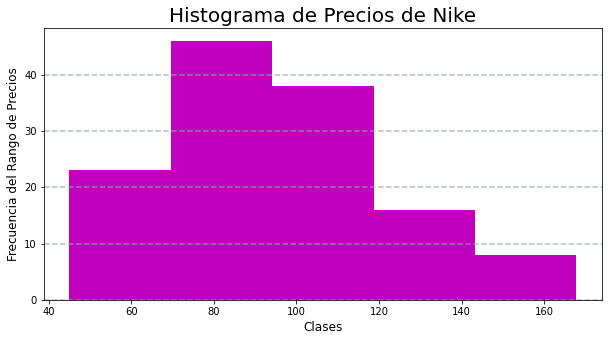

In [19]:
# Histograma de precios de Nike, sacar el número de clases con la regla de Sturges
plt.figure(figsize = (10, 5))
plt.hist(data[data["Marca"] == "Nike"]["Precio"], bins = (1 + int(np.log(len(data[data["Marca"] == "Nike"])))), color = "m")
plt.xlabel("Clases", fontsize = 12)
plt.ylabel("Frecuencia del Rango de Precios", fontsize = 12)
plt.title("Histograma de Precios de Nike", fontsize = 20)
plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
plt.show()

### Insigth 5

In [20]:
# Sacar la marca más "accesible" porque es vendida por más distribuidores
data.groupby("Marca")["Distribuidor"].nunique().sort_values(ascending = False).head(5)

Marca
Nike            18
Bearpaw         12
Converse        10
Skechers         9
Dr. Scholl's     9
Name: Distribuidor, dtype: int64

### Insigth 6

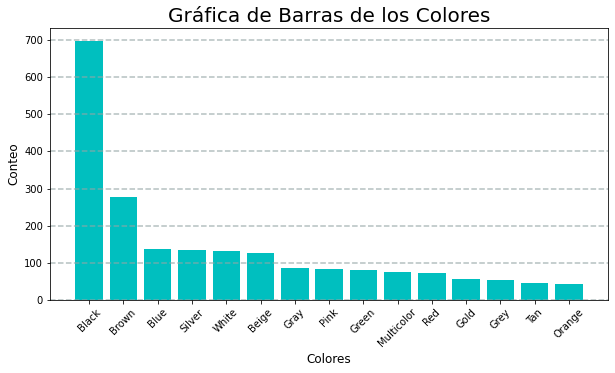

In [21]:
# Sacar gráfica de barras de los colores más comunes de los zapatos
fig = plt.figure(u"Gráfica de barras", figsize = (10, 5))
ax = fig.add_subplot(111)
datos_colores = list(data["Color"].value_counts().sort_values(ascending = False).head(15))
nombres = list(data["Color"].value_counts().sort_values(ascending = False).head(15).index)
ax.bar(range(len(datos_colores)), datos_colores, width = 0.8, align = "center", color = "c")
ax.set_xticks(range(len(datos_colores)))
ax.set_xticklabels(nombres)
plt.xticks(rotation = 45)
plt.xlabel("Colores", fontsize = 12)
plt.ylabel("Conteo", fontsize = 12)
plt.title("Gráfica de Barras de los Colores", fontsize = 20)
plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
plt.show()

# 2. Análisis de Similitud

In [22]:
# Recordar el dataset
data.head(5)

,Marca,Nombre,Color,Distribuidor,Precio
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,15.264000
1,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,23.227500
2,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.390000
3,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,17.100000
4,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,17.356667


In [23]:
# Número de valores únicos de la columna de Marca
data["Marca"].nunique()

832

In [24]:
# Número de valores únicos de la columna de Nombre
data["Nombre"].nunique()

4095

In [25]:
# Número de valores únicos de la columna de Color
data["Color"].nunique()

1593

In [26]:
# Número de valores únicos de la columna de Distribuidor
data["Distribuidor"].nunique()

194

In [27]:
# No se puede hacer un análisis de datos heterogéneos con todo el dataset porque todas las variables categóricas tienen
# demasiados valores únicos y quedarían muchas variables dummies. Decidimos únicamente usar la columna de precios (además porque)
# y dividirla de tal forma que nos queden 4 categorías de precios: "Gama muy baja", "Gama baja", "Gama media" y "Gama alta" De 
# esta forma, estas clasificaciones de precios serán las columnas, las marcas serán las filas y los datos serán un conteo de 
# zapatos, dentro de cada categoría de precio, que tiene cada marca. Procederemos a armar nuestro dataset.

In [30]:
# Hacer nuestras categorías con rangos de precio basados en los cuantiles
data["Precio"].describe()

count    4626.000000
mean       77.977706
std        97.898182
min         2.990000
25%        35.990000
50%        54.990000
75%        84.993750
max      1500.000000
Name: Precio, dtype: float64

In [ ]:
# Esto significa que nuestr